#Necessary Imports

In [ ]:
import pandas as pd
import os
import IPython
import re
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import numpy as np


In [ ]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

 99% 973M/987M [00:06<00:00, 154MB/s]
100% 987M/987M [00:06<00:00, 152MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/speech-emotion-recognition-en.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
Crema_Path='/content/Crema'
Ravdess_Path='/content/Ravdess'
Savee_Path='/content/Savee'
Tess_Path='/content/Tess'

In [ ]:
crema_wav_list = os.listdir(Crema_Path)
ravdess_wav_list = os.listdir(Ravdess_Path)
savee_wav_list = os.listdir(Savee_Path)
tess_wav_list = os.listdir(Tess_Path)
print(crema_wav_list)


['1073_MTI_NEU_XX.wav', '1054_TIE_ANG_XX.wav', '1067_TIE_ANG_XX.wav', '1045_IWL_HAP_XX.wav', '1010_TIE_DIS_XX.wav', '1050_TSI_NEU_XX.wav', '1043_IEO_FEA_LO.wav', '1087_MTI_DIS_XX.wav', '1081_DFA_FEA_XX.wav', '1045_TSI_NEU_XX.wav', '1079_ITS_ANG_XX.wav', '1064_IWL_SAD_XX.wav', '1008_ITS_NEU_XX.wav', '1030_ITH_SAD_XX.wav', '1082_WSI_FEA_XX.wav', '1017_IWW_DIS_XX.wav', '1052_DFA_HAP_XX.wav', '1062_WSI_SAD_XX.wav', '1053_IEO_NEU_XX.wav', '1057_TIE_HAP_XX.wav', '1032_ITH_FEA_XX.wav', '1065_IWL_FEA_XX.wav', '1032_IEO_DIS_HI.wav', '1038_WSI_ANG_XX.wav', '1046_DFA_SAD_XX.wav', '1040_DFA_DIS_XX.wav', '1041_WSI_HAP_XX.wav', '1088_IEO_FEA_MD.wav', '1036_IWL_FEA_XX.wav', '1011_IEO_DIS_HI.wav', '1025_IWL_SAD_XX.wav', '1011_DFA_FEA_XX.wav', '1073_DFA_HAP_XX.wav', '1036_TSI_ANG_XX.wav', '1028_TSI_FEA_XX.wav', '1056_TSI_SAD_XX.wav', '1028_IWW_NEU_XX.wav', '1052_IWW_NEU_XX.wav', '1052_TSI_FEA_XX.wav', '1091_ITH_NEU_XX.wav', '1054_IWW_DIS_XX.wav', '1023_TAI_HAP_XX.wav', '1077_ITH_NEU_XX.wav', '1075_IWL_

In [ ]:
IPython.display.Audio('/content/Crema/1001_DFA_ANG_XX.wav') #checking if Audio is working or not

# Labelling of Data

In [ ]:
# concepts for extracting 'KEYS' related to specific emotions as mentioned on Kaggle dataset description
wav = "1001_DFA_ANG_XX.wav"
crema_list = []
emotion=wav.partition(".wav")[0].split('_')
print(emotion)
if emotion[2]=='ANG':
        crema_list.append(('ang',Crema_Path+'/'+wav))

print(crema_list)

['1001', 'DFA', 'ANG', 'XX']
[('ang', '/content/Crema/1001_DFA_ANG_XX.wav')]


## Crema Labelling

In [ ]:
# Creates an empty list to hold tuples
crema = []

# Loops through each item in crema_wav_list
for wav in crema_wav_list:

    # Extracts the emotion label from the file name using partition and split methods
    emotion=wav.partition(".wav")[0].split('_')

    # Checks the emotion label and appends a tuple with the label and file path to the crema list
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))

# Prints the length of the crema list
print(len(crema))


7442


In [ ]:
print(crema[0:5])

[('neutral', '/content/Crema/1073_MTI_NEU_XX.wav'), ('angry', '/content/Crema/1054_TIE_ANG_XX.wav'), ('angry', '/content/Crema/1067_TIE_ANG_XX.wav'), ('happy', '/content/Crema/1045_IWL_HAP_XX.wav'), ('disgust', '/content/Crema/1010_TIE_DIS_XX.wav')]


In [ ]:
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                           File_Path
0  neutral  /content/Crema/1073_MTI_NEU_XX.wav
1    angry  /content/Crema/1054_TIE_ANG_XX.wav
2    angry  /content/Crema/1067_TIE_ANG_XX.wav
3    happy  /content/Crema/1045_IWL_HAP_XX.wav
4  disgust  /content/Crema/1010_TIE_DIS_XX.wav

## Ravdess Labelling

In [ ]:
print(Ravdess_Path)
ravdess = []
audio_speech_actors = '/content/Ravdess/audio_speech_actors_01-24'
actor_list = os.listdir(audio_speech_actors)
audio_speech_actors_path = os.path.join(Ravdess_Path, audio_speech_actors)
print(audio_speech_actors_path)
for actor in actor_list:
  actors = os.path.join(audio_speech_actors_path, actor)
  # print(actors)
  actors_dir = os.listdir(actors)
  # print(actors_dir)
  for wav in actors_dir:
    # print(wav)
    emotion=wav.partition('.wav')[0].split('-')
    emotion_number=int(emotion[2])
    ravdess.append((emotion_number,os.path.join(audio_speech_actors,actor,wav)))

Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()




/content/Ravdess
/content/Ravdess/audio_speech_actors_01-24


Emotion                                          File_Path
0     fear  /content/Ravdess/audio_speech_actors_01-24/Act...
1     calm  /content/Ravdess/audio_speech_actors_01-24/Act...
2      sad  /content/Ravdess/audio_speech_actors_01-24/Act...
3      sad  /content/Ravdess/audio_speech_actors_01-24/Act...
4  disgust  /content/Ravdess/audio_speech_actors_01-24/Act...

## Savee Labelling

In [ ]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                  File_Path
0  neutral  /content/Savee/JK_n14.wav
1  disgust  /content/Savee/JE_d03.wav
2  disgust  /content/Savee/JK_d14.wav
3     fear  /content/Savee/JK_f11.wav
4    angry  /content/Savee/JE_a15.wav

## Tess Labelling

In [ ]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                   File_Path
0   angry  /content/Tess/YAF_angry/YAF_moon_angry.wav
1   angry  /content/Tess/YAF_angry/YAF_hole_angry.wav
2   angry  /content/Tess/YAF_angry/YAF_turn_angry.wav
3   angry   /content/Tess/YAF_angry/YAF_ton_angry.wav
4   angry  /content/Tess/YAF_angry/YAF_puff_angry.wav

## Concatenation of All labelled Datasets

In [ ]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [ ]:
main_df

Emotion                                  File_Path
0     neutral         /content/Crema/1073_MTI_NEU_XX.wav
1       angry         /content/Crema/1054_TIE_ANG_XX.wav
2       angry         /content/Crema/1067_TIE_ANG_XX.wav
3       happy         /content/Crema/1045_IWL_HAP_XX.wav
4     disgust         /content/Crema/1010_TIE_DIS_XX.wav
...       ...                                        ...
2795     fear   /content/Tess/YAF_fear/YAF_room_fear.wav
2796     fear   /content/Tess/YAF_fear/YAF_thin_fear.wav
2797     fear   /content/Tess/YAF_fear/YAF_bite_fear.wav
2798     fear    /content/Tess/YAF_fear/YAF_mob_fear.wav
2799     fear  /content/Tess/YAF_fear/YAF_youth_fear.wav

[12162 rows x 2 columns]

# Plots i.e. Visualization Of Data

##Plot of percentage Emotion counts

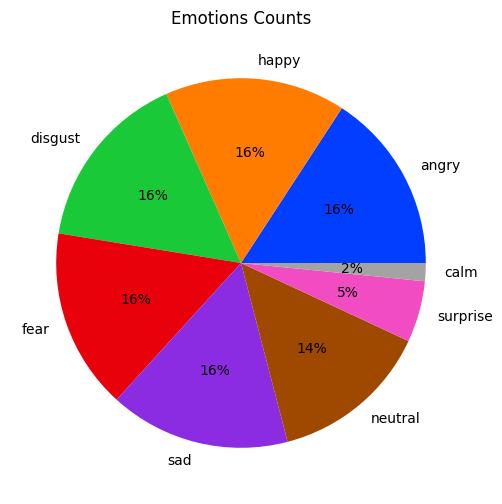

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
emotions_count = main_df['Emotion'].value_counts()
labels = emotions_count.index.tolist()
plt.pie(emotions_count, labels=labels, colors=palette_color, autopct='%.0f%%')
# plt.axis('equal')
plt.show()

## WavePlot

In [ ]:
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(6,3))
    plt.title(f'{emotion} emotion for waveplot',size=10)
    librosa.display.waveshow(y=data,sr=sr)

In [ ]:
emotion_names=main_df['Emotion'].unique()
print(emotion_names)

['neutral' 'angry' 'happy' 'disgust' 'fear' 'sad' 'calm' 'surprise']


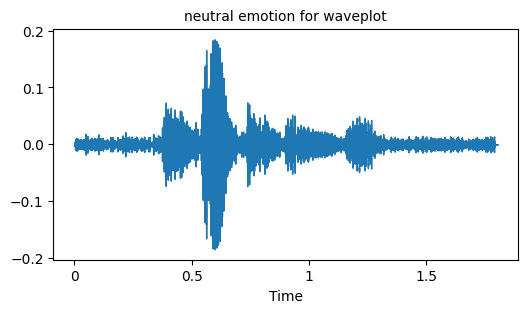

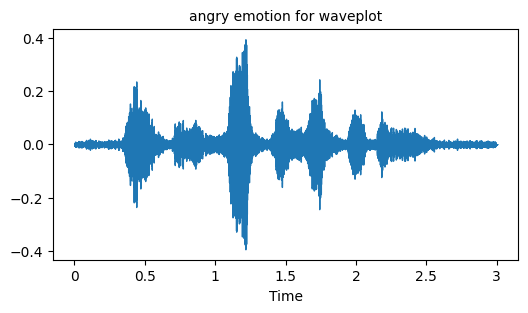

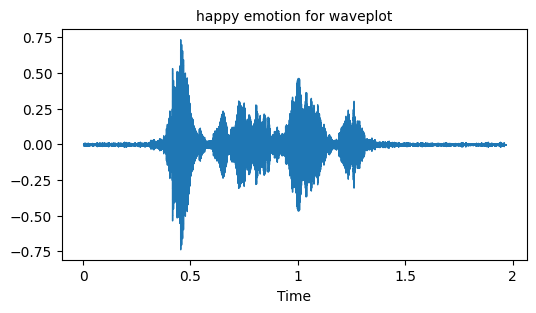

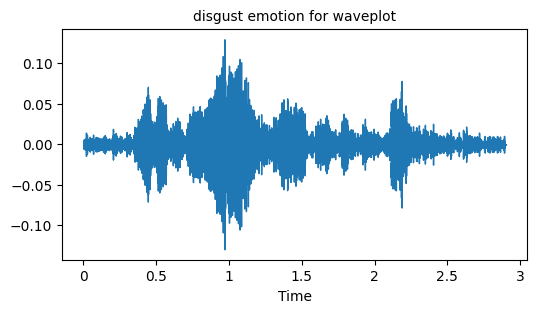

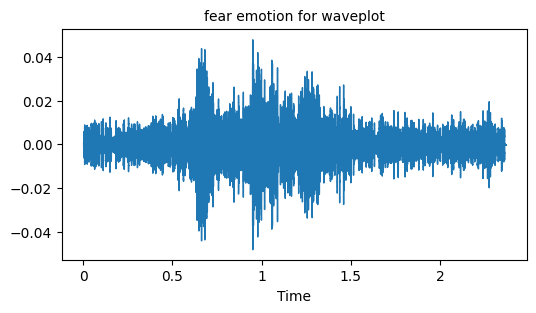

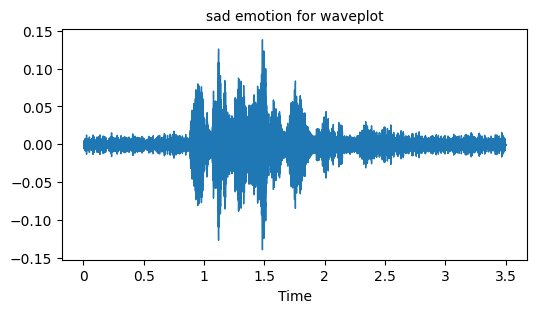

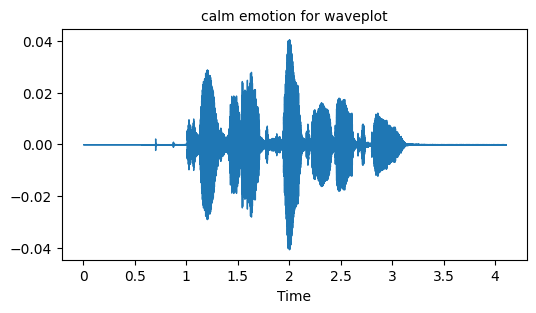

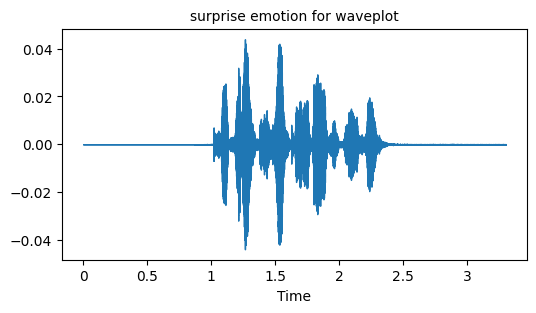

In [ ]:
audio_path=[]
for emotion in emotion_names:
    # path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    # print(len(path))
    # print(path)
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion)
    audio_path.append(path)

## SpectoGram Plot

In [ ]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(6,2.5))
    plt.title(f'{emotion} emotion for spectogram',size=10)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

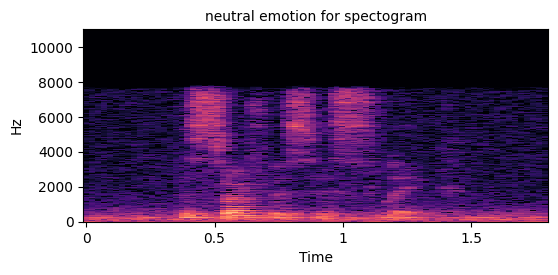

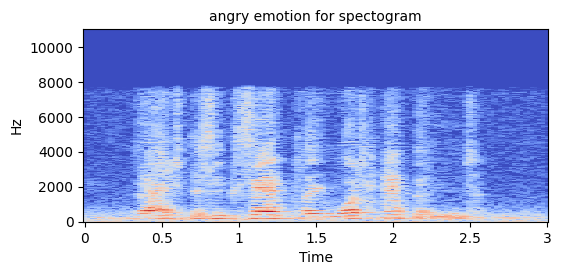

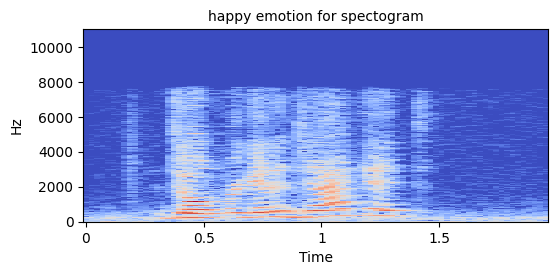

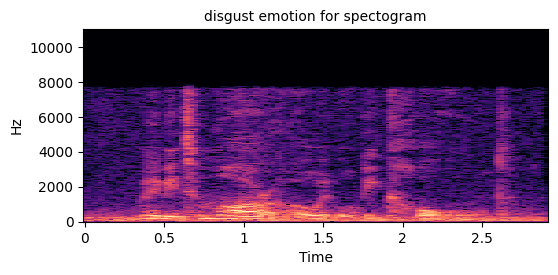

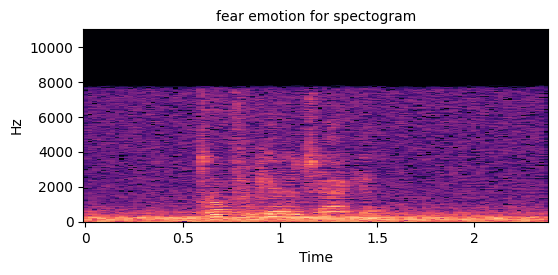

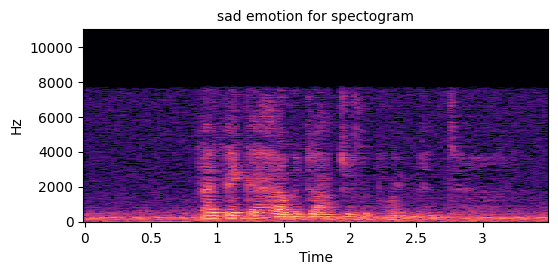

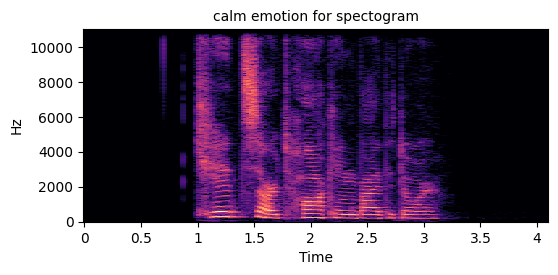

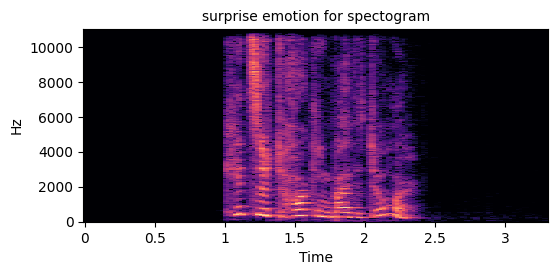

In [ ]:
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [ ]:
# print(audio_path)
for path in audio_path:
  x = path.partition(".wav")[0].split('/')
  if(x[2]=='Crema'):
    y = x[3]
    z = y.split('_')
    # if z[3]=='FEA':
    #   print(f'Fear Audio Sample')
    # if z[3]=='ANG':
    #   print(f'Angry Audio Sample')
    # if z[3]=='NEU':
    #   print(f'Neutral Audio Sample')
    # if z[3]=='SAD':
    #   print(f'Sad Audio Sample')
    # if z[3]=='HAP':
    #   print(f'Happy Audio Sample')
    # if z[3]=='DIS':
    #   print(f'Disgust Audio Sample')
  if(x[2]=='Ravdess'):
    y=x[5]
    z = y.split('-')
    # if z[3]=='O8':
    #   print(f'Surprised Audio Sample')
  # print(z)
  print(f'{z[2]} Audio Sample')
  IPython.display.display(IPython.display.Audio(path))

NEU Audio Sample


ANG Audio Sample


HAP Audio Sample


DIS Audio Sample


FEA Audio Sample


SAD Audio Sample


02 Audio Sample


08 Audio Sample


NEU Audio Sample


ANG Audio Sample


HAP Audio Sample


DIS Audio Sample


FEA Audio Sample


SAD Audio Sample


02 Audio Sample


08 Audio Sample


## Audio Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(main_df.File_Path)[1]
data, sample_rate = librosa.load(path)

##Simple Audio

Simple Audio Sample


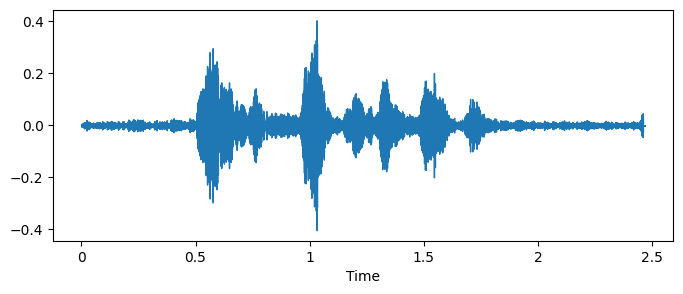

In [ ]:
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=data, sr=sample_rate)
print('Simple Audio Sample')
IPython.display.Audio(path)

## Noise Injection

Noised Audio Sample


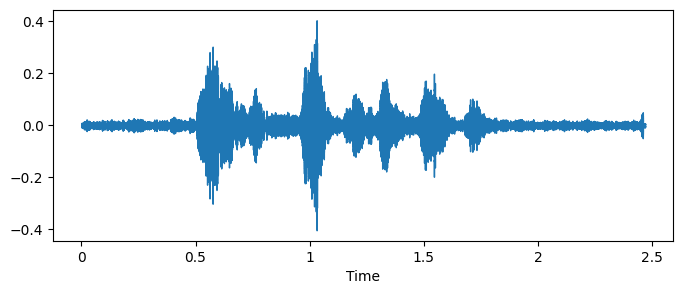

In [ ]:
x = noise(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=x, sr=sample_rate)
print('Noised Audio Sample')
IPython.display.Audio(x, rate=sample_rate)

##Stretching

Noised Audio Sample


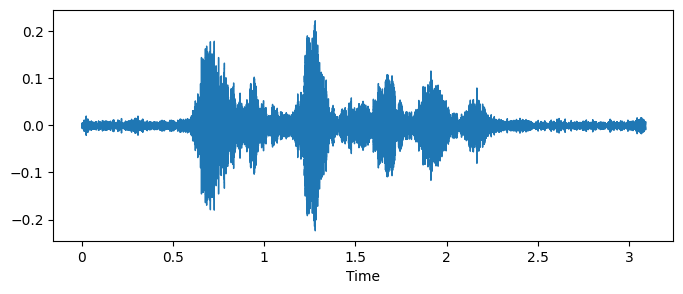

In [ ]:
x = stretch(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=x, sr=sample_rate)
print('Noised Audio Sample')
IPython.display.Audio(x, rate=sample_rate)

##Shifting

Shifted Audio Sample


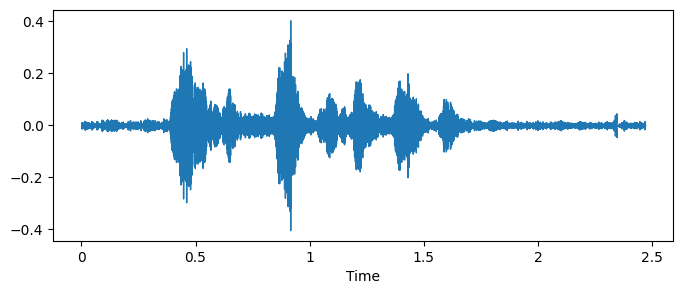

In [ ]:
x = shift(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=x, sr=sample_rate)
print('Shifted Audio Sample')
IPython.display.Audio(x, rate=sample_rate)

##Pitch

Pitch Audio Sample


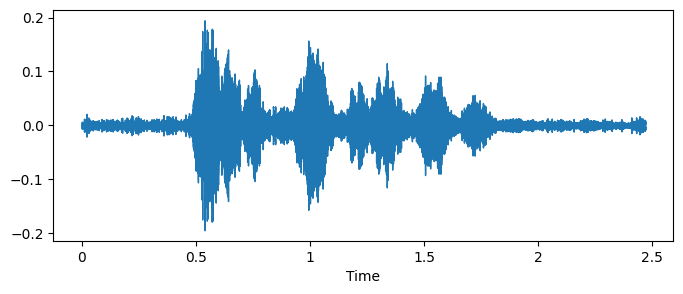

In [ ]:
x = pitch(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=x, sr=sample_rate)
print('Pitch Audio Sample')
IPython.display.Audio(x, rate=sample_rate)